In [2]:
import os
import tiktoken
import numpy as np
from dotenv import load_dotenv
import streamlit as st
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain.load import dumps, loads
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
model = ChatOpenAI(model="gpt-4o-mini", api_key=OPENAI_API_KEY)

data_directory = "/Users/taha/Desktop/rag/data"

In [3]:
# Özetleme zincirini oluşturma
def create_summary(doc_content):
    summary_template = ChatPromptTemplate.from_template(
        "Summarize the following document in German in a way that captures its semantic meaning most accurately.\n\n{doc}"
    )
    chain = summary_template | model | StrOutputParser()
    return chain.invoke({"doc": doc_content})

# Ana klasörün yolu (data klasörünün yolu)
data_directory = 'data'

# BURASI HER APP CALISTIGINDA TEKRARDAN SUMMARY OLSUTURUYOR
# CÜNKÜ KOMPLE PY DOSYASINI YÜKLÜYOR VE CALISTIRIYOR.
# SADECE SUMMARY YAPTIRMAK ISTEDIGINDE CALISTIR.

def summarize(data_directory): 
# data klasörü altındaki her bir ana klasör için işlem yapıyoruz
    for root, dirs, files in os.walk(data_directory):
        # root sadece bir üst seviyedeki dizini verir, bu yüzden sadece root içindeki ana klasörlerde işlemi yaparız
        if root == data_directory:
            for folder in dirs:
                folder_path = os.path.join(data_directory, folder)
                
                # _summary.txt dosyasını bu ana klasör içinde oluşturuyoruz (alfabetik olarak en üstte olacak şekilde)
                summary_file_path = os.path.join(folder_path, '_summary.txt')
                
                with open(summary_file_path, 'w') as summary_file:
                    # Bu klasörün altındaki tüm dosyaları listelemek için tekrar os.walk kullanıyoruz
                    for sub_root, sub_dirs, sub_files in os.walk(folder_path):
                        for file_name in sub_files:
                            if file_name != '_summary.txt' and file_name.endswith('.txt'):
                                # Her txt dosyasının tam yolunu alıyoruz
                                file_path = os.path.join(sub_root, file_name)
                                
                                # Dosyanın içeriğini okuyoruz
                                with open(file_path, 'r', encoding='utf-8') as txt_file:
                                    content = txt_file.read()
                                
                                # LangChain chain yapısını kullanarak belgeyi özetliyoruz
                                summary = create_summary(content)
                                
                                # Dosya yolunu ve özetini _summary.txt dosyasına yazıyoruz
                                summary_file.write(f"\n=== Chunk ===\n[File path: {file_path}\nFile summary: {summary}]\n")
                
                print(f"{folder} klasörüne _summary.txt dosyası yazıldı.")

In [7]:
summarize(data_directory)

---TRANSFORM QUERY---

Modified question:  eSIM nedir ve nasıl çalışır?
---ROUTE QUESTION---
---ROUTE QUESTION TO RAG---
"Node 'transform_query':"
'\n---\n'
---RETRIEVE---
Total embeddings calculated: 311
Total documents created: 311


/Users/taha/Desktop/rag/indexing.py:98: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use invoke instead.
  results = summary_retriever.get_relevant_documents(question)


Iteration 1, results found: 20
Number of unique results retrieved: 20
Successfully loaded document from: data/Mobilfunk/https___www.telekom.de_unterwegs_esim.txt
Successfully loaded document from: data/Mobilfunk/https___www.telekom.de_hilfe_mobilfunk_esim_wissenswertes_vorteile.txt
Successfully loaded document from: data/Mobilfunk/https___www.telekom.de_unterwegs_tarife-und-optionen_prepaid-iot-tarife_magentamobil-smart-connect-s-prepaid-card.txt
Successfully loaded document from: data/Mobilfunk/https___www.telekom.de_unterwegs_tarife-und-optionen_prepaid-tarife-for-friends_magentamobil-prepaid-l-for-friends.txt
Successfully loaded document from: data/Mobilfunk/https___www.telekom.de_unterwegs_tarife-und-optionen_prepaid-tarife_magentamobil-prepaid-xl.txt
Successfully loaded document from: data/Mobilfunk/https___www.telekom.de_unterwegs_tarife-und-optionen_prepaid-tarife-for-friends_magentamobil-prepaid-m-for-friends.txt
Successfully loaded document from: data/Mobilfunk/https___www.tel

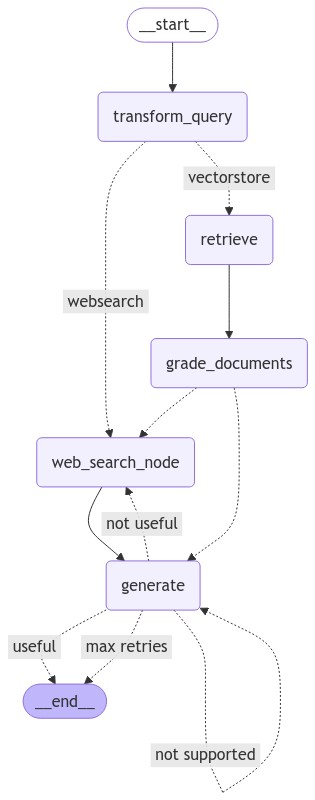

'eSIM, fiziksel SIM kart kullanımını ortadan kaldıran bir teknolojidir. Kullanıcıların mobil operatörlerini değiştirmelerini ve profillerini yönetmelerini kolaylaştırır. Bu dijital SIM çipi, mobil operatör profillerini depolamak ve yönetmek için kullanılır. eSIM ile profil yükleme ve aktivasyonu oldukça basittir. Ayrıca, daha güvenli bir yapı sunarak kullanıcılara esneklik, güvenlik ve çevre dostu bir deneyim sağlar. Uluslararası seyahatlerde maliyet avantajı ve kolay operatör değişimi gibi ek faydalar da sunar.'

In [8]:
import graph
graph.run_graph("esim nedir?")